# Funções de Ativação

O módulo ```nn```, que utilizamos para criar uma camada linear, também contém as principais funções de ativação. Então vamos primeiro importar o ```torch``` e o módulo ```nn``` <br>

In [1]:
import torch
from torch import nn
device = torch.device('cpu')  # Define a CPU como destino dos calculos do notebook


Agora vamos retomar o exemplo do início desse capítulo, onde implementamos um modelo de classificação linear, definindo empiricamente os parâmetros adequados.
Como já fizemos essa parte passo a passo, podemos copiar o código do nosso script:<br>
Classificação-Linear.ipynb - https://colab.research.google.com/drive/14fL7OsRj4EGCnN2PjVUYFZievtGsq9ox

-2.8


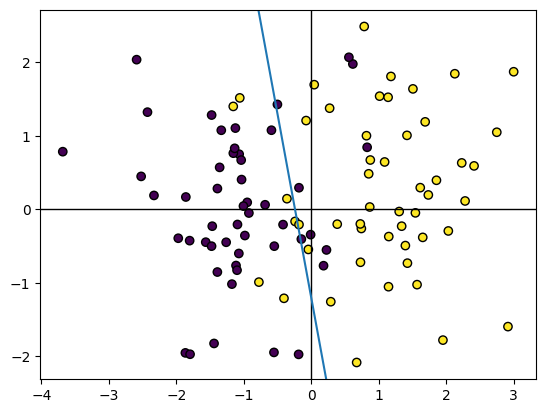

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(46)  # Garante reproducibilidade para o conjunto gerado

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)  # Cria um dataset bidimensional separavel

def plotmodel(w1, w2, b):
  
  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')  # Plota as amostras coloridas por classe
  
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()
  
  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2  # Resolve a equacao da reta ax + by + c = 0 para y

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')
  
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  
w1 = 5  # Coeficiente associado ao eixo x (a)
w2 = 1  # Coeficiente associado ao eixo y (b)
b  = 1.2  # Termo independente da equacao linear (c)
plotmodel(w1, w2, b)  # Renderiza a separacao linear escolhida

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)  # Avalia o sinal da funcao linear para o ponto testado


Agora vamos instanciar uma camada Linear análoga à nossa reta, ou seja:
* ```in_features  = 2``` : dimensionalidade da entrada
* ```out_features = 1``` : dimensionalidade da saída

Vamos instanciar também uma ativação sigmóide para compor o nosso modelo de classificação.
Documentação: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

Em seguida vamos substituir os pesos do perceptron com os parâmetros da nossa reta. Para isso criaremos um objeto ```Parameter```, o tipo de dado que camadas do PyTorch aceitam para representar os seus parâmetros. <br>
Documentação: https://pytorch.org/docs/stable/nn.html#torch.nn.Parameter


In [3]:
perceptron = nn.Linear(2, 1)  # Camada linear equivalente ao modelo ax + by + c
activation = nn.Sigmoid()  # Funcao de ativacao logistica padrao

print(perceptron.weight.data)
print(perceptron.bias.data)

perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))  # Sobrescreve os pesos com os coeficientes definidos manualmente
perceptron.bias   = nn.Parameter(torch.Tensor([b]))  # Ajusta o bias para acompanhar a reta escolhida

print(perceptron.weight.data)
print(perceptron.bias.data)


tensor([[0.5321, 0.0125]])
tensor([0.5621])
tensor([[5., 1.]])
tensor([1.2000])


Temos portanto:
* uma distribuição de pontos com duas classes linearmente separáveis
* um modelo linear de classificação binária, empiricamente definido, que inclui uma função de ativação sigmóide. 

Agora vamos ver a diferença entre o resultado apresentado pelo perceptron antes e depois da função de ativação. Para isso, selecionei empiricamente alguns pontos da distribuiçã (índices 17, 21, 43 e 66) que nos ajudarão a entender o impacto da sigmóide.

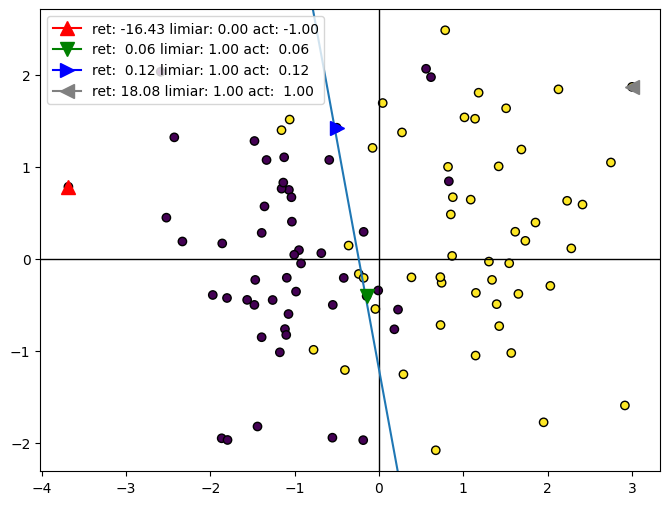

In [21]:
markers = ['^', 'v', '>', '<']    # Simbolos usados para distinguir os pontos avaliados
colors = ['r', 'g', 'b', 'gray']  # Paleta para destacar cada amostra

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
# Analisa quatro amostras especificas do dataset
for k, idx in enumerate([17, 21, 43, 66]):
  # Converte a amostra numpy em tensor para passar pelo modelo
  x = torch.Tensor(X[idx])
  
  # Calcula a combinacao linear
  ret = perceptron(x)
  # Aplica a funcao de ativacao escolhida
  act = activation(ret)
  
  # Classificacao binaria via limiar em 0
  act_limiar = 0 if ret.data < 0 else 1
  
  # Monta a legenda com metricas
  label = (
    'ret: {:5.2f}'.format(ret.data.numpy()[0]) +
    ' limiar: {:4.2f}'.format(act_limiar) +
    ' act: {:5.2f}'.format(act.data.numpy()[0])
  )
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  
plt.legend()
plt.show()


Com a sigmoid, elementos na fronteira de decisão recebem o valor 0.5, indicando baixa certeza sobre a classe desses elementos. Quanto mais afasta da zona de confusão, maior a certeza da classificação (seja para 0, ou para 1).

Podemos experimentar diferentes funções de ativação e ver como elas nos ajudam a interpretar a saída do perceptron.

In [20]:
# Descomente uma das linhas abaixo e rode novamente a celula anterior

# activation = nn.Sigmoid()  # Funcao de ativacao logistica padrao
# activation = nn.ReLU()  # Alterna a funcao de ativacao para comparar resultados
activation = nn.Tanh()


No notebook Ativações.ipynb geramos uma distribuição aleatória correspondendo a um problema de classificação binária. Em seguida, comparamos a saída original do perceptron com diferentes funções de ativação: limiar, Sigmoide, ReLU e Tanh. A comparação foi feita para 4 diferentes pontos da distribuição aleatoriamente gerada, correspondendo aos índices [17, 21, 43, 66].

Selecione diferentes pontos da distribuição para conhecer mais a fundo o comportamento das funções de ativação que experimentamos. Deve-se rodar o script Ativações.ipynb em sua forma original, alterando somente a penúltima célula na seguinte linha:

```
for k, idx in enumerate([17, 21, 43, 66]):
```

A atividade proposta sugere explorar diferentes pontos da distribuição, portanto, não há resposta correta quanto à escolha de pontos. Podemos ver, por exemplo, que os pontos [1, 2, 3, 4] com a ativação Sigmoide vão resultar no seguinte gráfico:

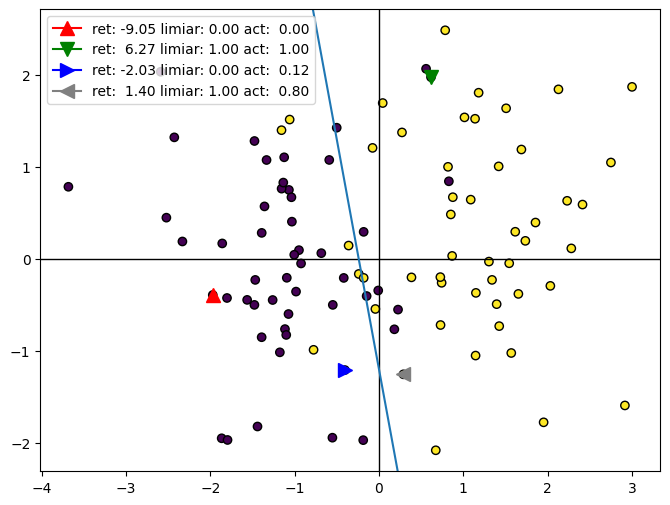

In [19]:

activation = nn.Sigmoid()  # Funcao de ativacao logistica padrao
markers = ['^', 'v', '>', '<']    # Simbolos usados para distinguir os pontos avaliados
colors = ['r', 'g', 'b', 'gray']  # Paleta para destacar cada amostra

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
# Analisa quatro amostras especificas do dataset
for k, idx in enumerate([1, 2, 3, 4]):
  # Converte a amostra numpy em tensor para passar pelo modelo
  x = torch.Tensor(X[idx])
  
  # Calcula a combinacao linear
  ret = perceptron(x)
  # Aplica a funcao de ativacao escolhida
  act = activation(ret)
  
  # Classificacao binaria via limiar em 0
  act_limiar = 0 if ret.data < 0 else 1
  
  # Monta a legenda com metricas
  label = (
    'ret: {:5.2f}'.format(ret.data.numpy()[0]) +
    ' limiar: {:4.2f}'.format(act_limiar) +
    ' act: {:5.2f}'.format(act.data.numpy()[0])
  )
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)
  
plt.legend()
plt.show()
